In [15]:
from modules.attunet import AttentionU_Net, DiceBCELoss
from modules.dataset import Dataset
from modules.preprocess import preprocess_data
from modules.visualisation import visualizeTraining, display_images
from modules.train import Train

import json, os, random, torch
from torch.utils.data import DataLoader
from torchvision import transforms

In [22]:
# data_path = "./data"
# preprocess_data_path = './data'
# output_path = './out/'
# saved_model_path = "./model/model.pth"

# num_epochs = 50
# lr=1e-3
# batch_size = 32
# patience = 3

data_path = '/kaggle/input/brain-tumor-image-dataset-semantic-segmentation'
preprocess_data_path = '/kaggle/working/'
output_path = '/kaggle/working'
saved_model_path = "/kaggle/working/model.pth"

num_epochs = 200
lr=1e-3
batch_size = 32
patience = 3

In [23]:
with open(data_path + '/valid/_annotations.coco.json','r') as file:
    raw_annotations_data = json.load(file)

image_paths = [os.path.join(data_path + '/valid', i['file_name']) for i in raw_annotations_data['images']]

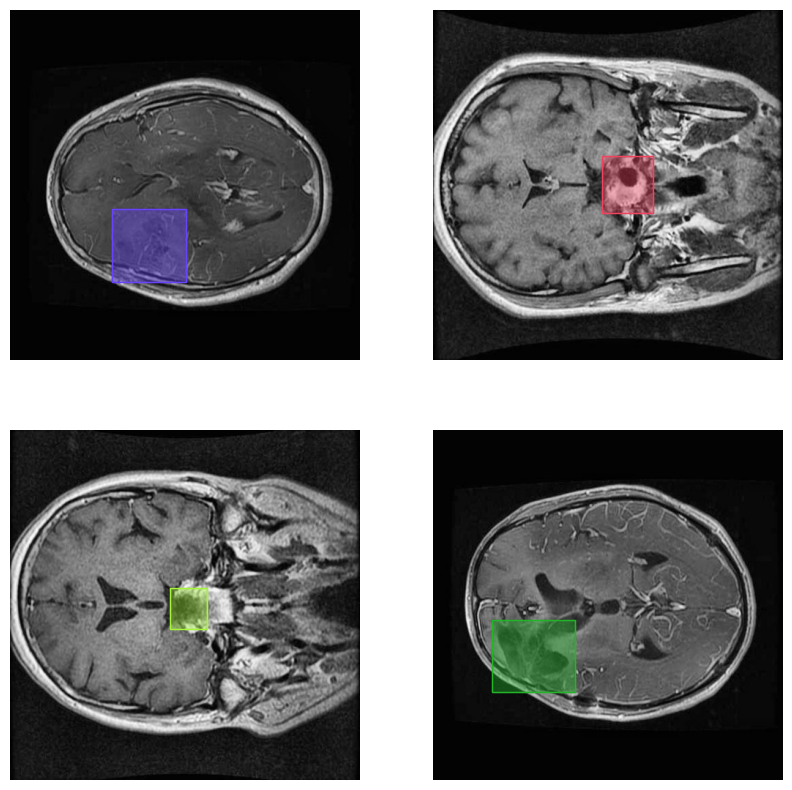

In [24]:
random_image_files = random.sample(image_paths, 4)
display_images(random_image_files, raw_annotations_data)

In [25]:
#preprocessing data
preprocess_data(data_path + '/train', preprocess_data_path + '/train')
preprocess_data(data_path + '/valid', preprocess_data_path + '/valid')

In [26]:
#image transformations
image_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229]),
    transforms.Lambda(lambda x: x.clamp(0, 1))
])

#create datasets
train_dataset = Dataset(preprocess_data_path + '/train_prep', transform=image_transform)
valid_dataset = Dataset(preprocess_data_path + '/valid_prep', transform=image_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = DiceBCELoss()

model = AttentionU_Net(1,1)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

train_losses, val_losses = Train(model, optimizer, loss_fn, train_loader, valid_loader, device, patience, num_epochs=num_epochs, patience=patience, saved_model_path=saved_model_path)

100%|██████████| 47/47 [00:52<00:00,  1.12s/it]


Epoch 1/200, Train Loss: 1.1490
Validation Loss: 1.4165


100%|██████████| 47/47 [00:52<00:00,  1.12s/it]


Epoch 2/200, Train Loss: 0.8661
Validation Loss: 0.9488


100%|██████████| 47/47 [00:52<00:00,  1.13s/it]


Epoch 3/200, Train Loss: 0.7032
Validation Loss: 0.9208


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 4/200, Train Loss: 0.6224
Validation Loss: 0.8825


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 5/200, Train Loss: 0.5618
Validation Loss: 0.6595


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 6/200, Train Loss: 0.5154
Validation Loss: 0.5437


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 7/200, Train Loss: 0.4899
Validation Loss: 0.6429


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 8/200, Train Loss: 0.4777
Validation Loss: 0.6006


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 9/200, Train Loss: 0.4497
Validation Loss: 0.5300


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 10/200, Train Loss: 0.4286
Validation Loss: 0.5912


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 11/200, Train Loss: 0.4192
Validation Loss: 0.4972


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 12/200, Train Loss: 0.3942
Validation Loss: 0.4557


100%|██████████| 47/47 [00:52<00:00,  1.13s/it]


Epoch 13/200, Train Loss: 0.3679
Validation Loss: 0.5052


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 14/200, Train Loss: 0.3717
Validation Loss: 0.4752


100%|██████████| 47/47 [00:52<00:00,  1.13s/it]


Epoch 15/200, Train Loss: 0.3490
Validation Loss: 0.4706


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 16/200, Train Loss: 0.3323
Validation Loss: 0.5016


100%|██████████| 47/47 [00:52<00:00,  1.13s/it]


Epoch 17/200, Train Loss: 0.3242
Validation Loss: 0.4696


100%|██████████| 47/47 [00:52<00:00,  1.12s/it]


Epoch 18/200, Train Loss: 0.3030
Validation Loss: 0.4816


100%|██████████| 47/47 [00:52<00:00,  1.12s/it]


Epoch 19/200, Train Loss: 0.2907
Validation Loss: 0.4557


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 20/200, Train Loss: 0.2852
Validation Loss: 0.4299


100%|██████████| 47/47 [00:52<00:00,  1.13s/it]


Epoch 21/200, Train Loss: 0.2632
Validation Loss: 0.4648


100%|██████████| 47/47 [00:53<00:00,  1.14s/it]


Epoch 22/200, Train Loss: 0.2562
Validation Loss: 0.4299


100%|██████████| 47/47 [00:52<00:00,  1.13s/it]


Epoch 23/200, Train Loss: 0.2517
Validation Loss: 0.5077


100%|██████████| 47/47 [00:52<00:00,  1.12s/it]


Epoch 24/200, Train Loss: 0.2333
Validation Loss: 0.4493


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 25/200, Train Loss: 0.2201
Validation Loss: 0.4739


100%|██████████| 47/47 [00:52<00:00,  1.12s/it]


Epoch 26/200, Train Loss: 0.2043
Validation Loss: 0.4565


100%|██████████| 47/47 [00:52<00:00,  1.12s/it]


Epoch 27/200, Train Loss: 0.2192
Validation Loss: 0.4462


100%|██████████| 47/47 [00:52<00:00,  1.13s/it]


Epoch 28/200, Train Loss: 0.2025
Validation Loss: 0.4351


100%|██████████| 47/47 [00:52<00:00,  1.13s/it]


Epoch 29/200, Train Loss: 0.1852
Validation Loss: 0.4483


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 30/200, Train Loss: 0.1707
Validation Loss: 0.4403


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 31/200, Train Loss: 0.1846
Validation Loss: 0.6016


100%|██████████| 47/47 [00:53<00:00,  1.13s/it]


Epoch 32/200, Train Loss: 0.1679
Validation Loss: 0.4719
Training stopped early.


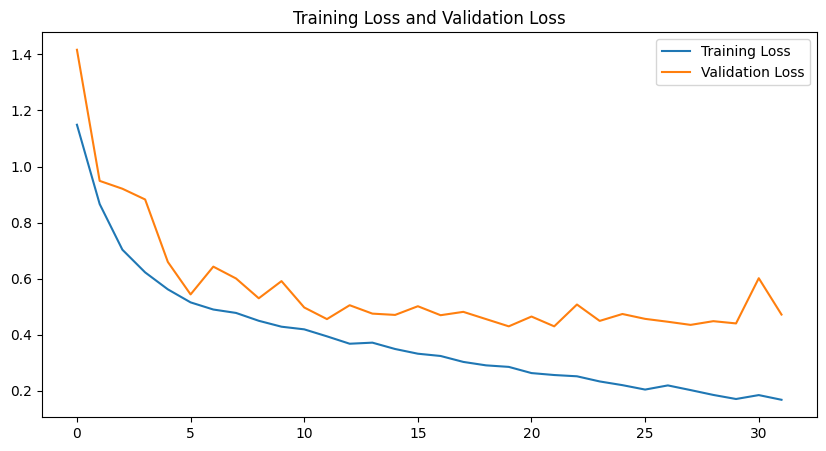

In [28]:
visualizeTraining(train_losses, val_losses)